In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 140

In [3]:
df = pd.read_csv('daily-temperature.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
df.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [6]:
df.Date = pd.to_datetime(df.Date, format = '%Y-%M-%d')

In [7]:
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [8]:
df.set_index('Date', inplace = True)

In [9]:
df.head()

,Temp
Date,
1981-01-01 00:01:00,20.7
1981-01-02 00:01:00,17.9
1981-01-03 00:01:00,18.8
1981-01-04 00:01:00,14.6
1981-01-05 00:01:00,15.8


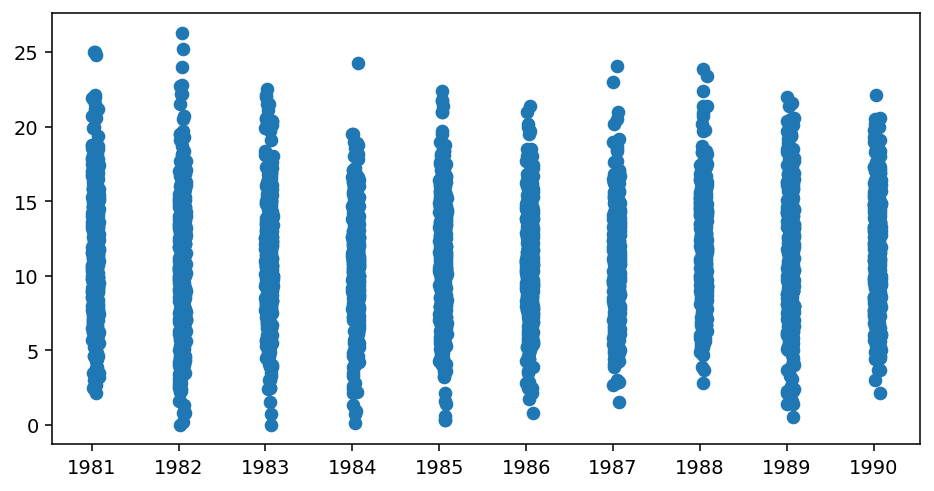

In [10]:
plt.plot_date(x = df.index, y = df.values)

<AxesSubplot:xlabel='Date'>

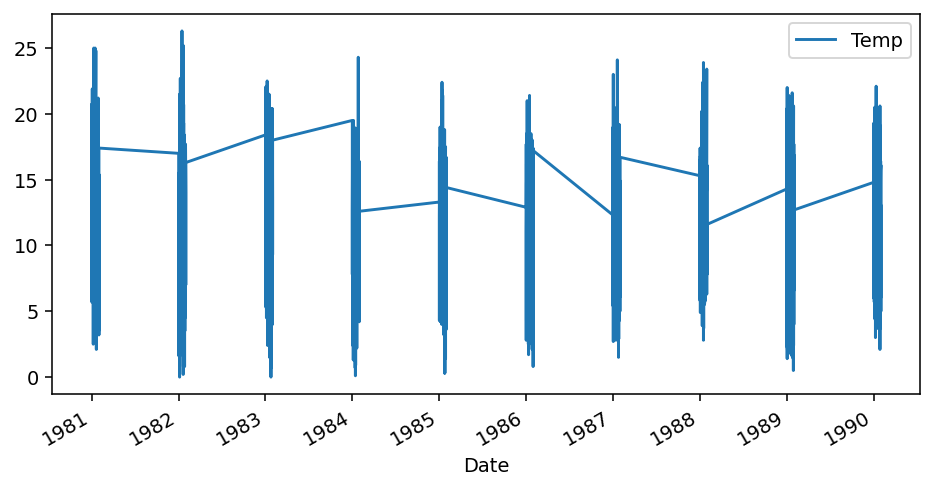

In [11]:
df.plot()

In [12]:
df = pd.read_csv('daily-temperature.csv')

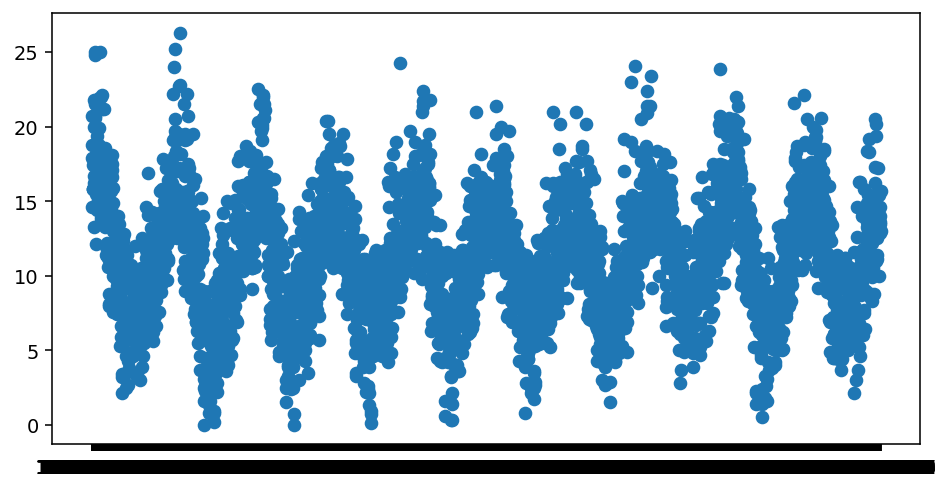

In [13]:
plt.plot_date(x = df.Date, y = df.Temp)

In [14]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

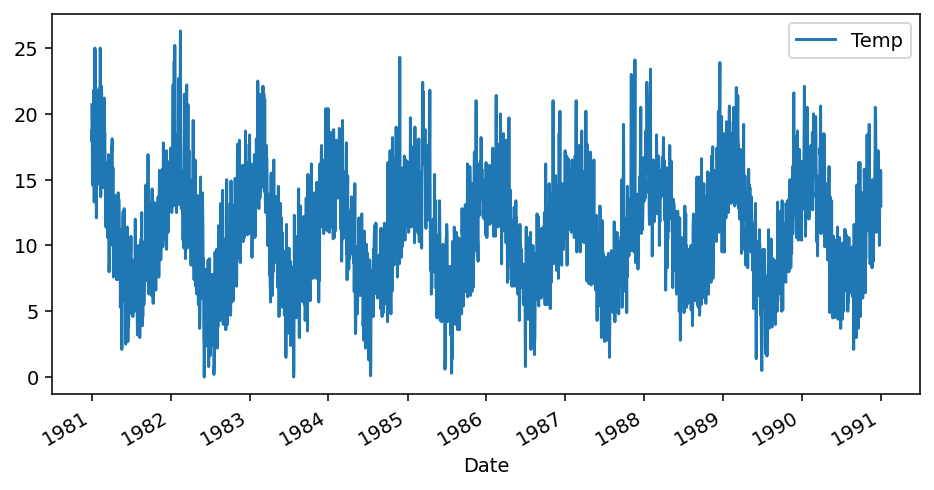

In [15]:
df.plot()

In [16]:
df = df.reset_index()

In [17]:
df.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [18]:
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [19]:
df.Date = df.Date.dt.year

In [20]:
grp = df.groupby('Date')

In [21]:
grp.groups.keys()

dict_keys([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [22]:
grp.get_group(1981).Temp.values

array([20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20. , 16.2,
       13.3, 16.7, 21.5, 25. , 20.7, 20.6, 24.8, 17.7, 15.5, 18.2, 12.1,
       14.4, 16. , 16.5, 18.7, 19.4, 17.2, 15.5, 15.1, 15.4, 15.3, 18.8,
       21.9, 19.9, 16.6, 16.8, 14.6, 17.1, 25. , 15. , 13.7, 13.9, 18.3,
       22. , 22.1, 21.2, 18.4, 16.6, 16.1, 15.7, 16.6, 16.5, 14.4, 14.4,
       18.5, 16.9, 17.5, 21.2, 17.8, 18.6, 17. , 16. , 13.3, 14.3, 11.4,
       16.3, 16.1, 11.8, 12.2, 14.7, 11.8, 11.3, 10.6, 11.7, 14.2, 11.2,
       16.9, 16.7,  8.1,  8. ,  8.8, 13.4, 10.9, 13.4, 11. , 15. , 15.7,
       14.5, 15.8, 16.7, 16.8, 17.5, 17.1, 18.1, 16.6, 10. , 14.9, 15.9,
       13. ,  7.6, 11.5, 13.5, 13. , 13.3, 12.1, 12.4, 13.2, 13.8, 10.6,
        9. , 10. ,  9.8, 11.5,  8.9,  7.4,  9.9,  9.3,  9.9,  7.4,  8.6,
       11.9, 14. ,  8.6, 10. , 13.5, 12. , 10.5, 10.7,  8.1, 10.1, 10.6,
        5.3,  6.6,  8.5, 11.2,  9.8,  5.9,  3.2,  2.1,  3.4,  5.4,  9.6,
       11.5, 12.3, 12.6, 11. , 11.2, 11.4, 11.8, 12

In [23]:
data = pd.DataFrame()
for key in grp.groups.keys():
    data[key] = grp.get_group(key).Temp.values

In [24]:
data

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


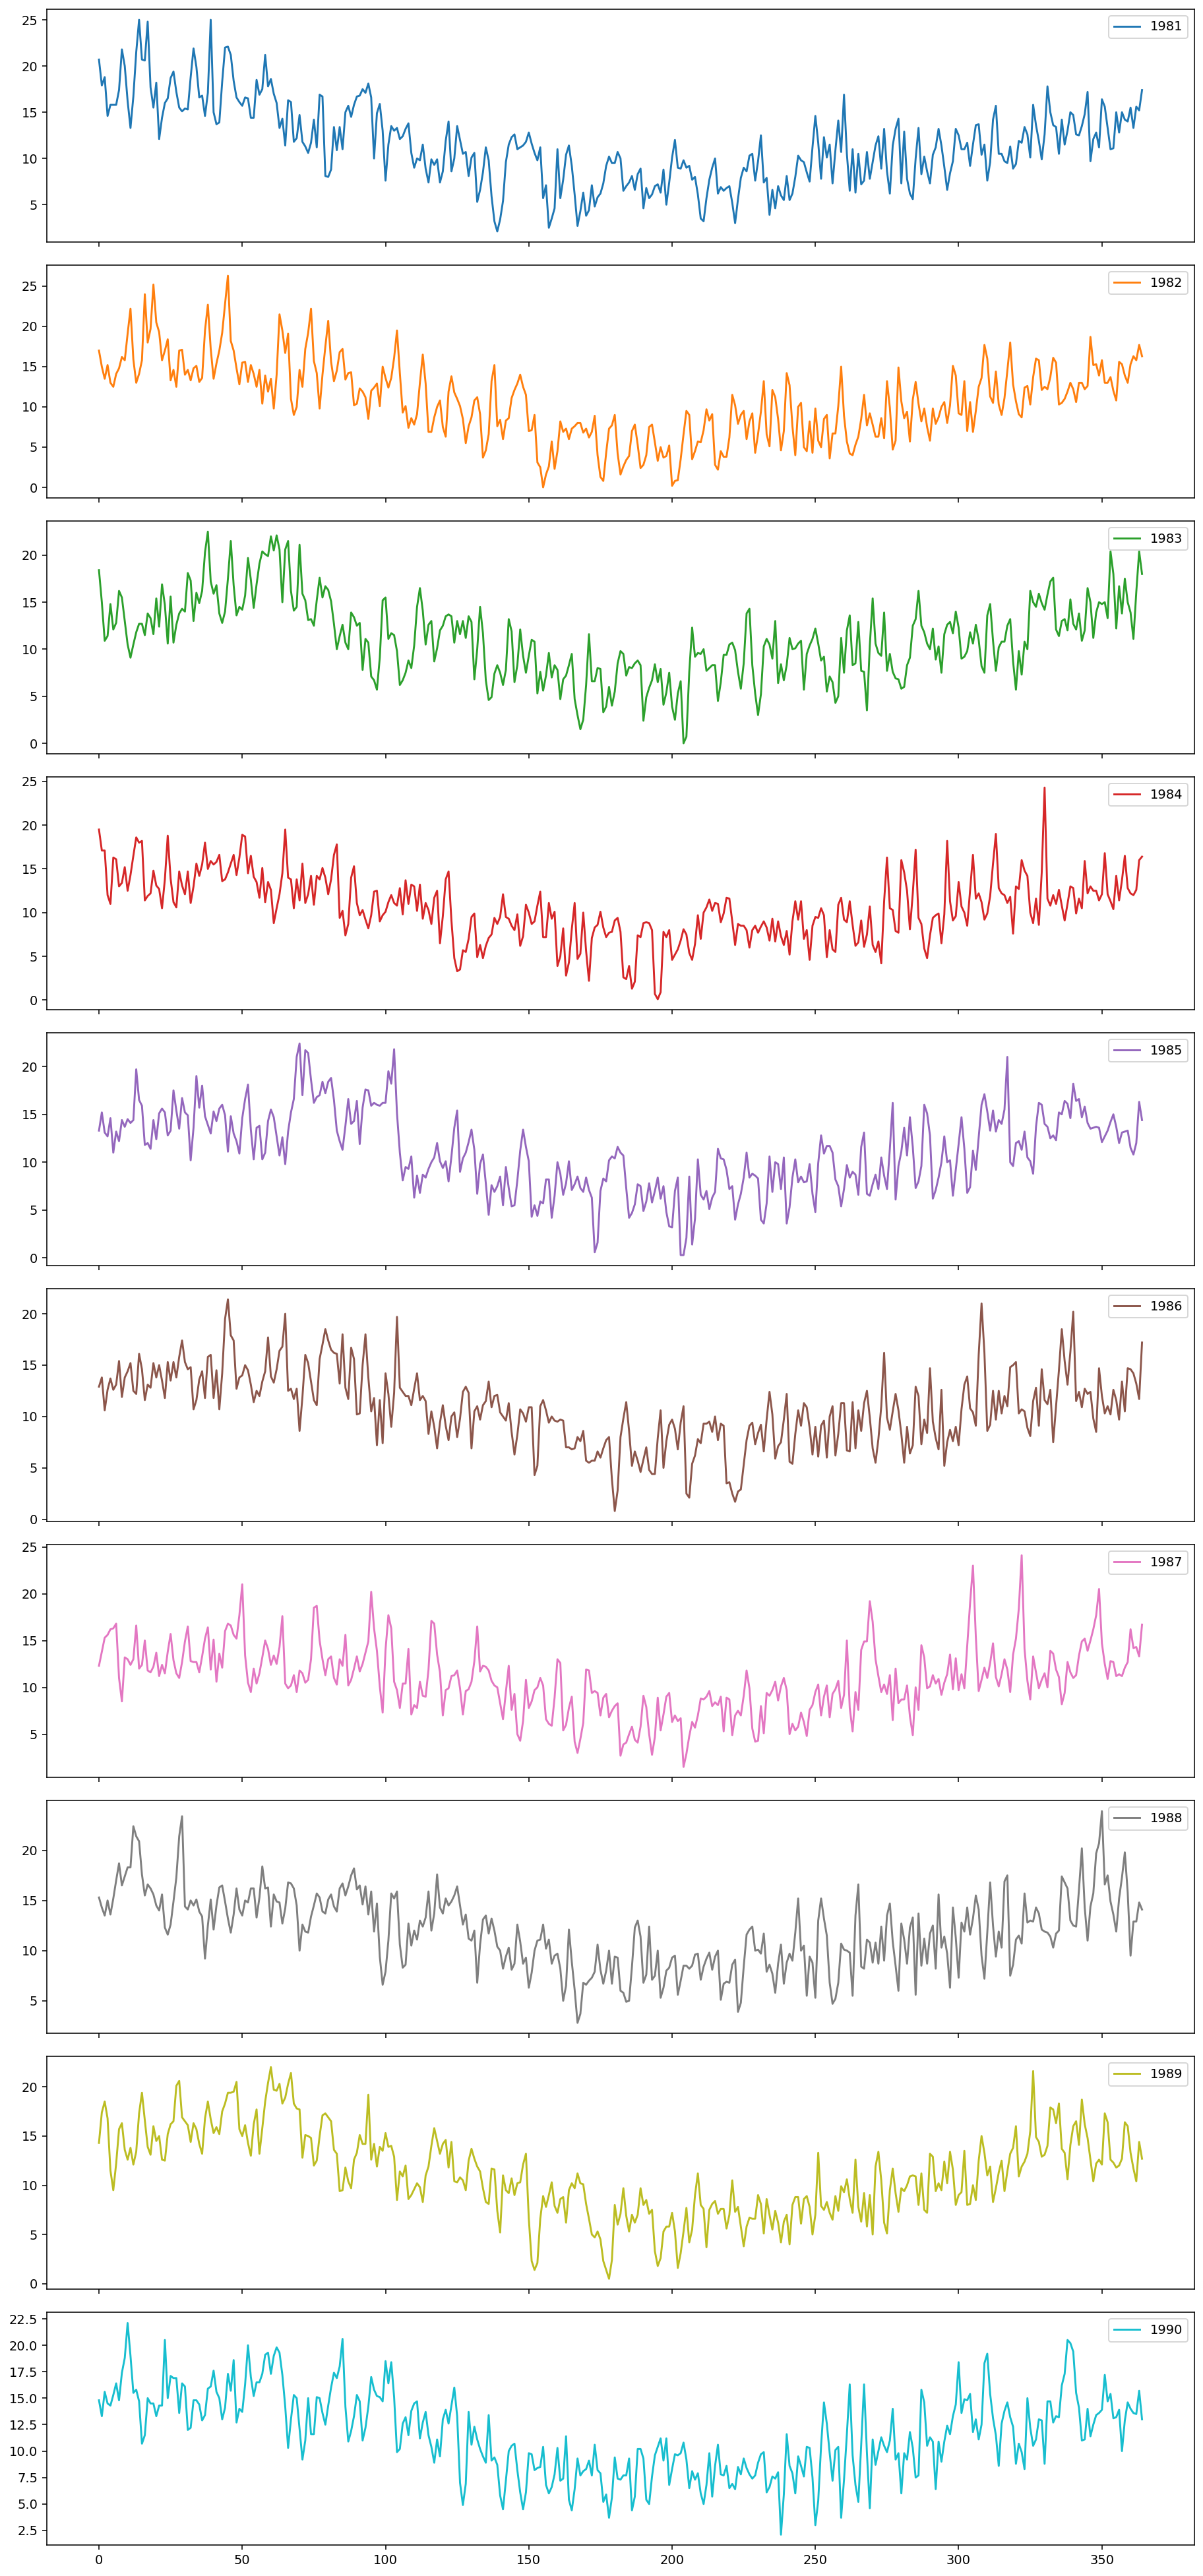

In [32]:
data.plot(kind = 'line', subplots = True, figsize = (13,28))
plt.tight_layout()

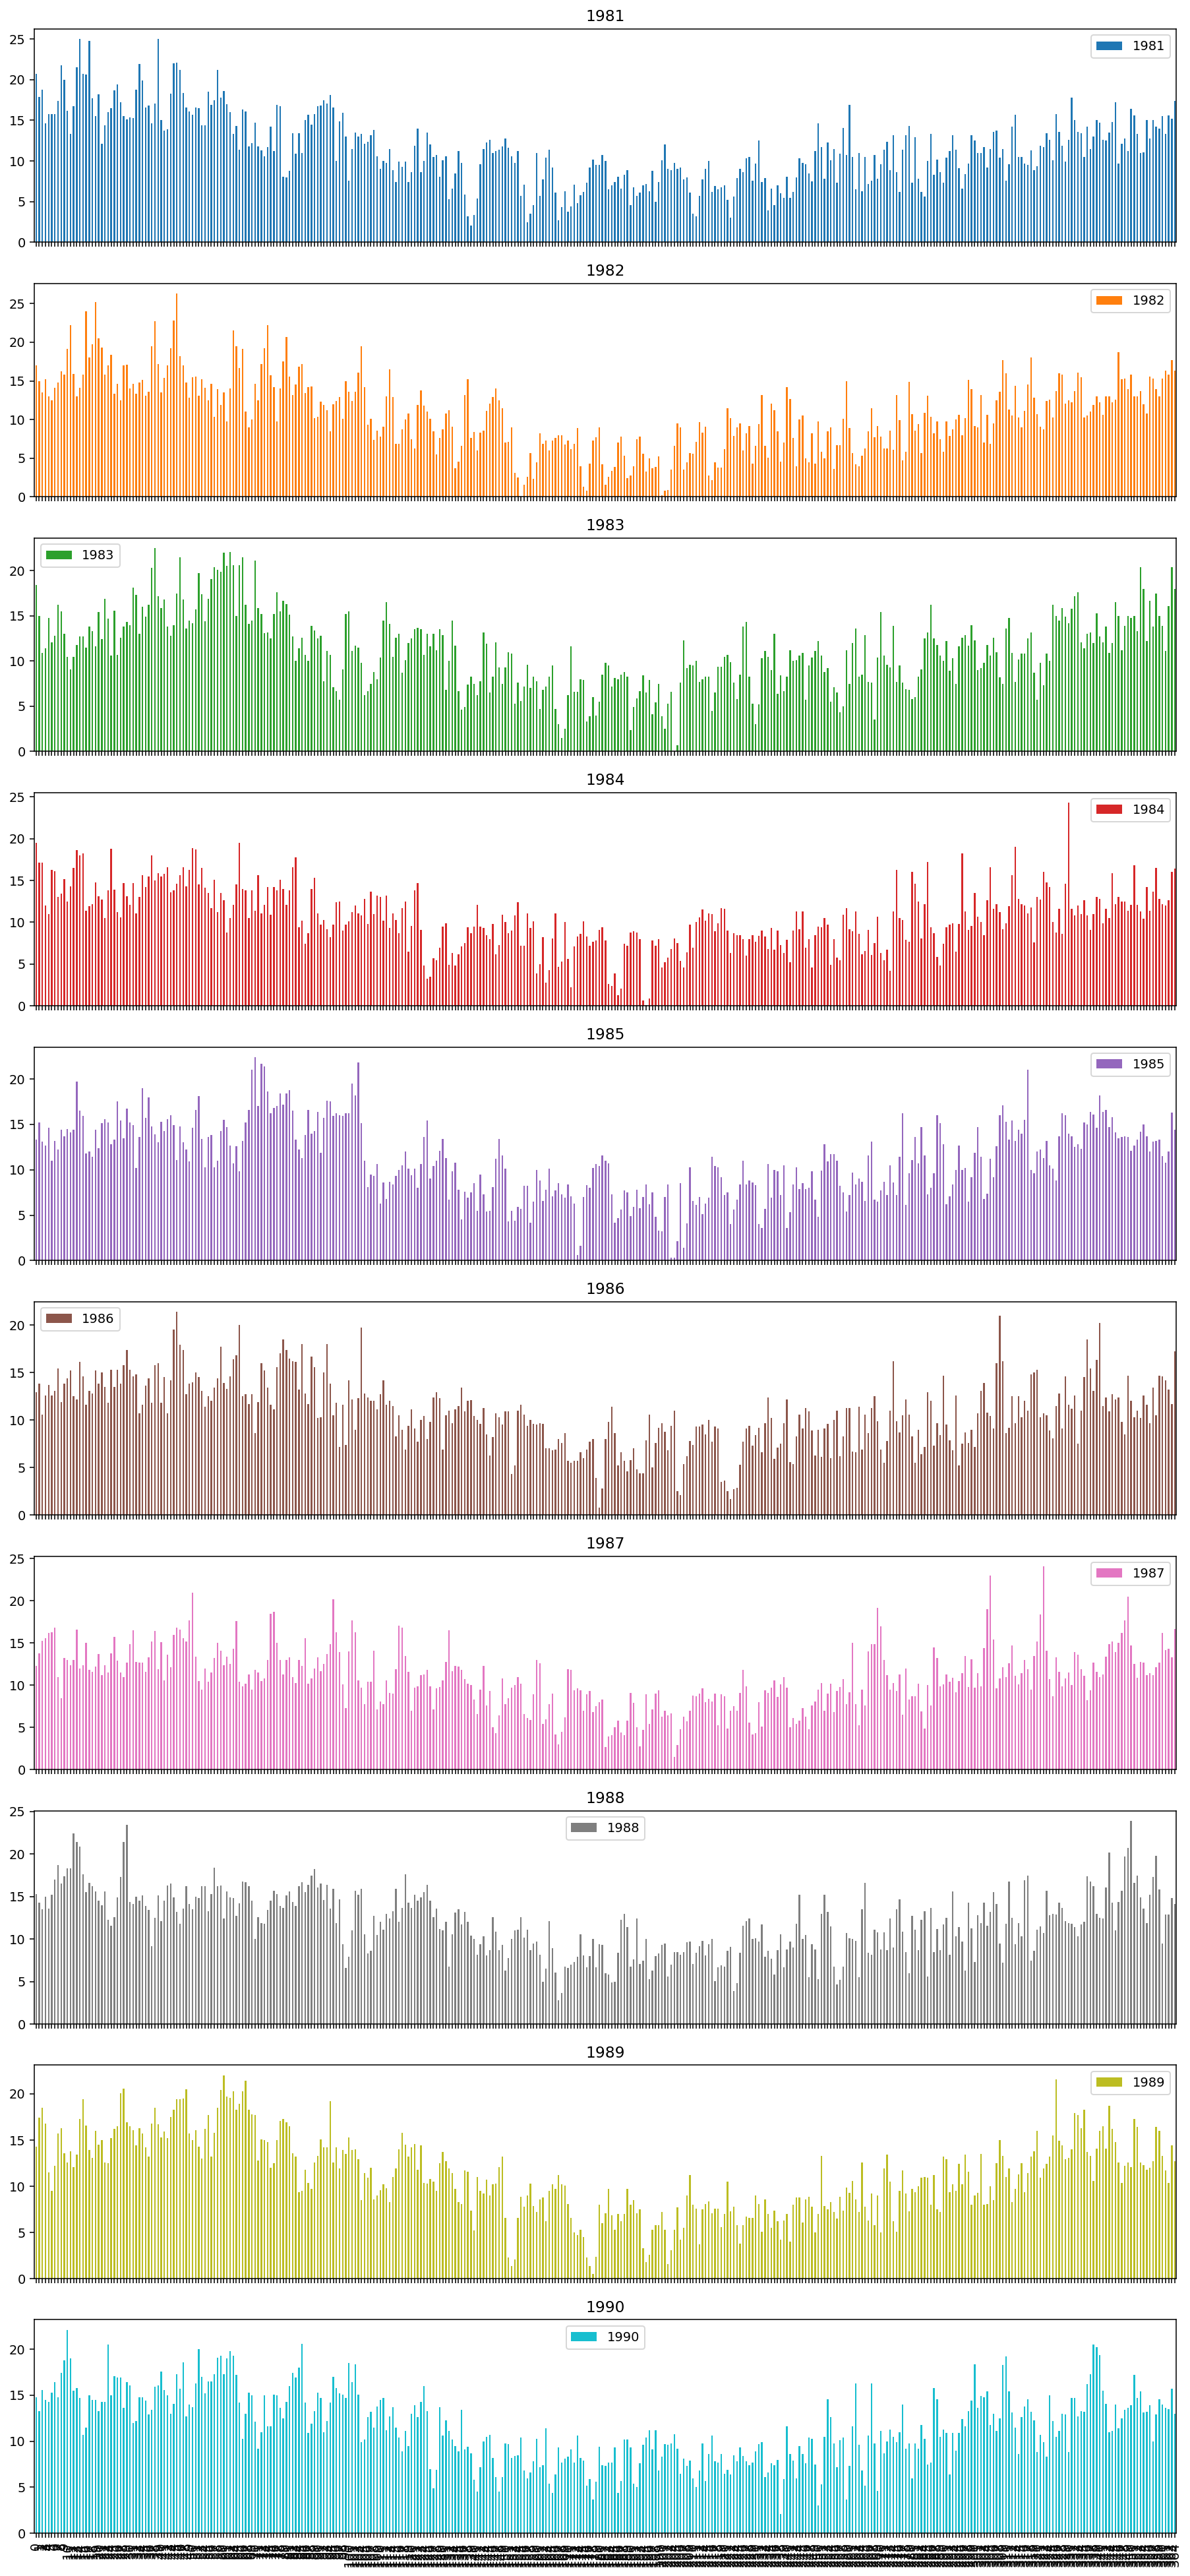

In [33]:
data.plot(kind = 'bar')
plt.tight_layout()

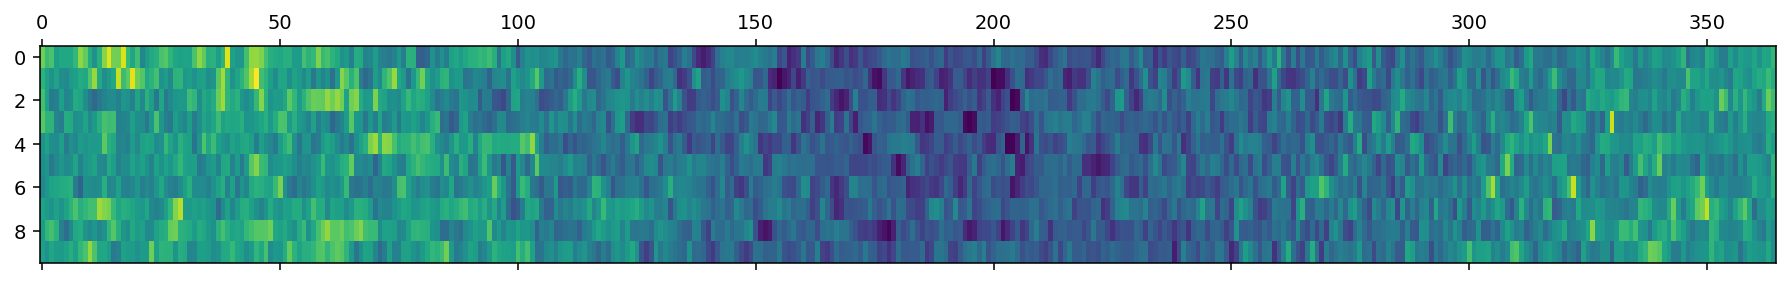

In [40]:
plt.matshow(data.T, aspect = 'auto')

In [41]:
df = pd.read_csv('daily-temperature.csv')

In [42]:
df.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


<AxesSubplot:ylabel='Frequency'>

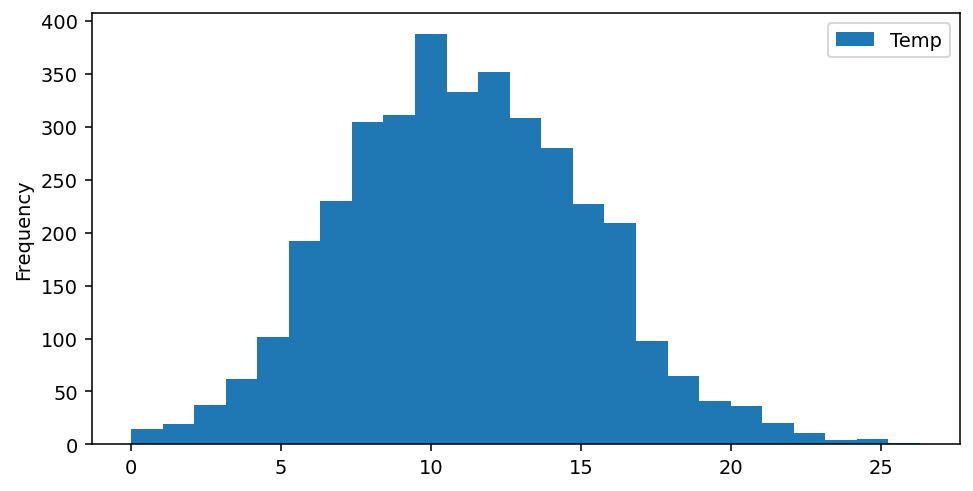

In [48]:
df.plot(kind = 'hist', bins = 25)

In [50]:
import seaborn as sns

<AxesSubplot:xlabel='Temp', ylabel='Count'>

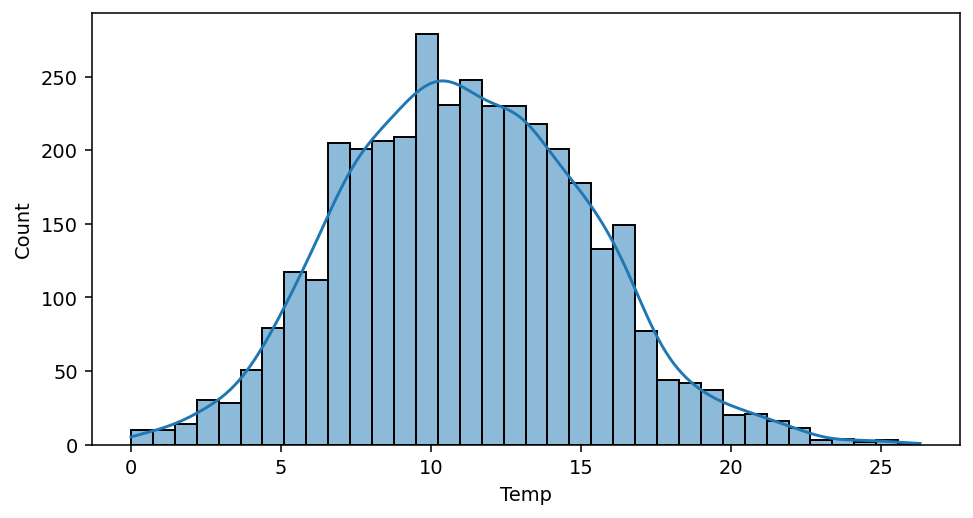

In [51]:
sns.histplot(data = df, x = 'Temp', kde = True)

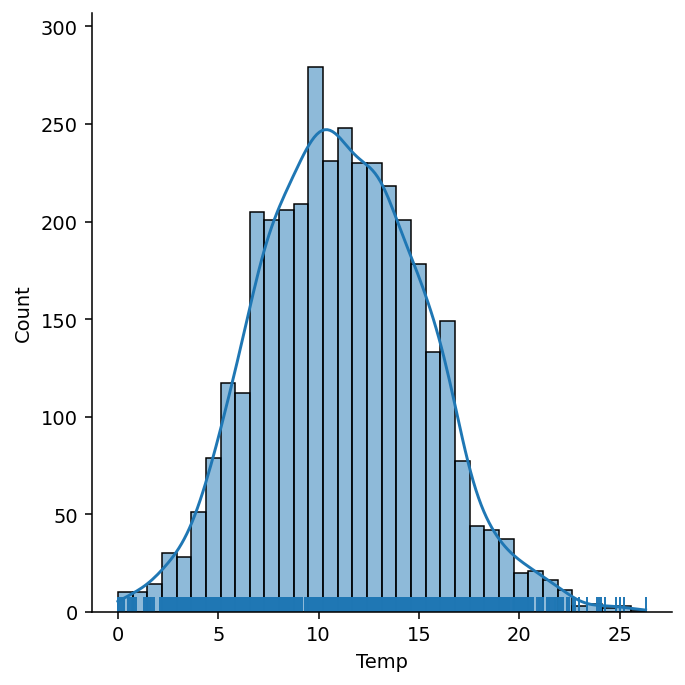

In [54]:
sns.displot(data = df, x = 'Temp', rug = True, kde = True, kind = 'hist');